In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [153]:
class AgentState(TypedDict):    
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """A simple greeting node that initializes the state with a message."""
    
    state['message'] = "Hey " + state["message"] + ", how is your day going?"
    return state

In [154]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)

graph.set_entry_point("greeting")
graph.set_finish_point("greeting")

app = graph.compile()

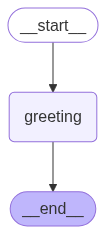

In [155]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [156]:
app.invoke({"message" : "Ninada"})

{'message': 'Hey Ninada, how is your day going?'}

In [8]:
class AgentState(TypedDict):    
    message: str

def name_node(state: AgentState) -> AgentState:
    """The first exercise of the LangGraph tutorial."""
    
    state['name'] = state["name"] + ", you're doing great!"
    return state

In [9]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("name", name_node)

graph.set_entry_point("greeting")
graph.set_finish_point("name")

app = graph.compile()

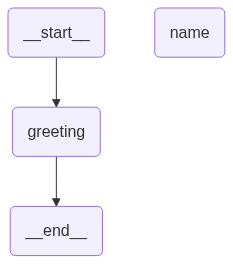

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

## Multiple  Input Graph ##

In [12]:
class AgentState(TypedDict):
    values: list[int]
    name : str
    result : int

In [20]:
def process_values(state: AgentState) -> AgentState:
    """Process the multiple differen inputs"""
    print(state)
    
    state['result'] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
    print(state)
    return state

In [21]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

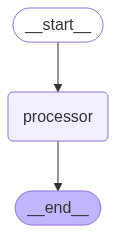

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
answer = app.invoke({"values": [1, 2, 3], "name": "Ninada"})

{'values': [1, 2, 3], 'name': 'Ninada'}
{'values': [1, 2, 3], 'name': 'Ninada', 'result': 'Hi there Ninada! Your sum = 6'}


In [23]:
print(answer)

{'values': [1, 2, 3], 'name': 'Ninada', 'result': 'Hi there Ninada! Your sum = 6'}


In [ ]:
print(answer['result'])  

Hi there Ninada! Your sum = 6


### Exercise 2 ###

In [33]:
class AgentState(TypedDict):
    values: list[int]
    name : str
    operation: str
    result : int
    message: str

In [40]:
def math_operation(state: AgentState) -> AgentState:
    """Perform a mathematical operation based on the state."""
    if state['operation'] == '+':
        state['result'] = sum(state['values'])
    elif state['operation'] == '*':
        state['result'] = 1
        for vlaue in state['values']:
            state['result'] *= vlaue
    elif state['operation'] == '-':
        state['result'] = state['values'][0]
        for value in state['values'][1:]:
            state['result'] -= value
    elif state['operation'] == '/':
        state['result'] = state['values'][0]
        for value in state['values'][1:]:
            if value != 0:
                state['result'] /= value
            else:
                state['result'] = "Error: Division by zero"
    else:
        state['result'] = 0

    state['message']  = f"Hi, {state['name']}! The result of your operation is: {state['result']}"

    return state

In [41]:
graph = StateGraph(AgentState)
graph.add_node("math_operation", math_operation)
graph.set_entry_point("math_operation") 
graph.set_finish_point("math_operation")
app = graph.compile()

In [42]:
answer = app.invoke({"values" : [1,2,3,5], "name": "Ninada", "operation": "+"})

In [43]:
print(answer) 


{'values': [1, 2, 3, 5], 'name': 'Ninada', 'operation': '+', 'result': 11, 'message': 'Hi, Ninada! The result of your operation is: 11'}


In [44]:
print(answer['message'])

Hi, Ninada! The result of your operation is: 11


## Sequential Graph ##

In [46]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str    

In [47]:
def first_node(state: AgentState) -> AgentState:
    """First node of sequence graph."""
    state['final'] = f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """Second node of sequence graph."""
    state['final'] = state["final"] + f" You are {state['age']} years old."
    return state

In [48]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

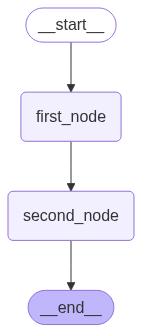

In [49]:
display(Image(app.get_graph().draw_mermaid_png()))

In [53]:
result = app.invoke({"name": "Ninada", "age": "24"})

In [54]:
print(result['final'])

Hi Ninada! You are 24 years old.


### Exercise 3 ###

In [55]:
class AgentState(TypedDict):
    name : str
    age : str
    skills: list[str]
    final : str

In [56]:
def first_node(state: AgentState) -> AgentState:
    """A simple first node that initializes the state with a name."""    
    state['final'] = f"Welcome {state['name']}! "
    return state

def second_node(state: AgentState) -> AgentState:
    """A simple second node that appends the age to the final message."""
    state['final'] += f"You are {state['age']} years old."
    return state

def third_node(state: AgentState) -> AgentState:
    """A simple third node that appends the skills to the final message."""
    if state['skills']:
        state['final'] += f" Your skills are: {', '.join(state['skills'])}."
    else:
        state['final'] += " You have no skills listed."
    return state

In [58]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()

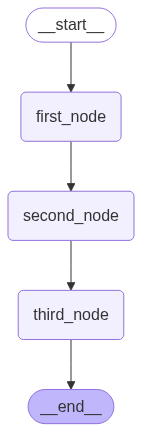

In [59]:
display(Image(app.get_graph().draw_mermaid_png()))

In [60]:
answer = app.invoke({"name": "Ninada", "age": "24", "skills": ["Python", "AI"]})
print(answer['final'])  

Welcome Ninada! You are 24 years old. Your skills are: Python, AI.


## Conditional Graphs ##

In [61]:
from langgraph.graph import StateGraph, START, END

In [75]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int



In [77]:
def adder(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

# this function returning next edge not the state
def decide_next_node(state: AgentState) -> AgentState:
    """Decide which node to go next based on the operation."""
    if state['operation'] == '+':
        return 'addition_opration'
    elif state['operation'] == '-':
        return 'subtraction_operation'
    

In [78]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
#adding the router node
graph.add_node("router", lambda state: state) #passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # define edges
        'addition_opration': "adder_node",
        'subtraction_operation': "subtractor_node"
    } 
                            
)
graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app = graph.compile()


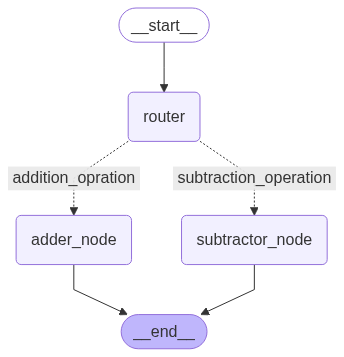

In [79]:
display(Image(app.get_graph().draw_mermaid_png()))

In [80]:
initial_state_1 = AgentState(number1 = 10, operation = "+", number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}


### Exersice 4 

In [81]:
class AgentState(TypedDict):
    number1: int    
    number2: int
    operation1: str
    number3: int
    number4: int
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [84]:
def adder1(state: AgentState) -> AgentState:
    """Add first 2 numbers"""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    """Add second 2 numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """Subtract second 2 numbers"""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtract second 2 numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """Decide which node to go next based on the operation."""
    if state['operation1'] == '+':
        return 'addition_opration1'
    elif state['operation1'] == '-':
        return 'subtraction_operation1'
    
def decide_next_node2(state: AgentState) -> AgentState:
    """Decide which node to go next based on the operation."""
    if state['operation2'] == '+':
        return 'addition_opration2'
    elif state['operation2'] == '-':
        return 'subtraction_operation2' 

    

In [86]:
graph = StateGraph(AgentState)
graph.add_node("adder_node1", adder1)
graph.add_node("adder_node2", adder2)
graph.add_node("subtractor_node1", subtractor1)     
graph.add_node("subtractor_node2", subtractor2)

graph.add_node("router1", lambda state: state)  # passthrough function
graph.add_node("router2", lambda state: state)  

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        'addition_opration1': "adder_node1",
        'subtraction_operation1': "subtractor_node1"
    } 
)
graph.add_edge("adder_node1", "router2")
graph.add_edge("subtractor_node1", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        'addition_opration2': "adder_node2",
        'subtraction_operation2': "subtractor_node2"
    } 
)
graph.add_edge("adder_node2", END)
graph.add_edge("subtractor_node2", END)

app = graph.compile()


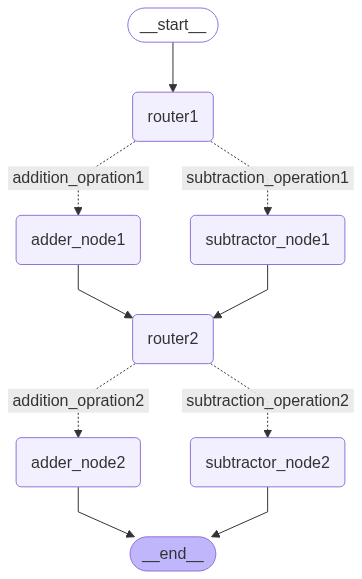

In [87]:
display(Image(app.get_graph().draw_mermaid_png()))

In [88]:
initial_state_1 = AgentState(number1 = 10, operation1 = "-", number2 = 5, number3 = 20, number4 = 6, operation2 = "+")
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'operation1': '-', 'number3': 20, 'number4': 6, 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 26}


## Looping Graph ##

In [91]:
import random
from typing import List, TypedDict

In [92]:
class AgentState(TypedDict):
    name : str
    number : List[int]
    counter: int

In [101]:
def greeting_node(state: AgentState) -> AgentState:
    """A simple greeting node that initializes the state with a message."""
    state['name'] = f"Hi, there, {state['name']}."
    #state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """generate random number from 0 to 10"""
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Decide whether to continue or not based on the counter."""
    if state['counter'] < 5:
        return "continue"
    else:
        return "finish"

In [102]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)

graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random",
    should_continue,
    {
        'continue': "random",
        'finish': END
    }
)

graph.set_entry_point("greeting")
app = graph.compile()



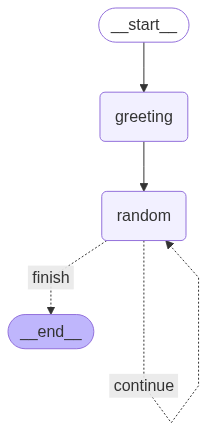

In [103]:
display(Image(app.get_graph().draw_mermaid_png()))

In [104]:
app.invoke({"name": "Ninada", "number": [], "counter": -2})

{'name': 'Hi, there, Ninada.', 'number': [7, 4, 1, 9, 3, 8, 9], 'counter': 5}

### Exersice 5 ###

In [144]:
class AgentState(TypedDict):
    number : int
    guess : List[int]    
    highBound: int
    lowBound: int
    counter: int    

In [149]:
def setup(state: AgentState) -> AgentState:
    """Initialize the game with a random number."""
    state['number'] = random.randint(1, 20)
    state['guess'] = []   
    state['counter'] = 0
    state['highBound'] = 20
    state['lowBound'] = 1    
    return state

def guess(state: AgentState) -> AgentState:
    """Process the user's guess."""
    state['guess'].append(random.randint(state['lowBound'], state['highBound']))
    state['counter'] += 1    
    return state

def check_guess(state: AgentState) -> AgentState:
    """Check the guess is correct or not"""
    if state['guess'][-1] == state['number']:        
        print("You found the number!")
        return "correct"
    else:              
        return "incorrect"
    
def adjust_bounds(state: AgentState) -> AgentState:
    """Adjust the bounds based on the guess."""
    if state['guess'][-1] < state['number']:
        state['lowBound'] = state['guess'][-1] + 1
    elif state['guess'][-1] > state['number']:
        state['highBound'] = state['guess'][-1] - 1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Decide whether to continue or not based on the counter."""
    if state['counter'] < 7:
        return "continue"
    else:
        return "finish"    
    

In [150]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("adjust_bounds", adjust_bounds)

graph.add_conditional_edges(
    "guess",
    check_guess,
    {
        'correct': END,
        'incorrect': "adjust_bounds"
    }
)
graph.add_conditional_edges(
    "adjust_bounds",
    should_continue,
    {
        'continue': "guess",
        'finish': END
    })

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")

graph.set_entry_point("setup")

app = graph.compile()

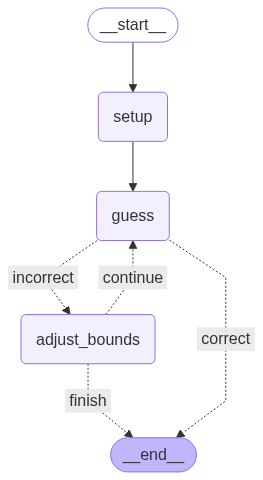

In [151]:
display(Image(app.get_graph().draw_mermaid_png()))

In [152]:
initial_state = AgentState(number = 0, guess = [], highBound = 20, lowBound = 1, counter = 0)
app.invoke(initial_state)

You found the number!


{'number': 17,
 'guess': [9, 14, 17],
 'highBound': 20,
 'lowBound': 15,
 'counter': 3}